# Visualizations functions

In [1]:
import matplotlib
import pySTIM as pst

In [2]:
import warnings
warnings.filterwarnings('ignore')

The example dataset used in this tutorial is from a human colorectal cancer sample (Sample P5 CRC) which can be downloaded from the [10X Genomics](https://www.10xgenomics.com/products/visium-hd-spatial-gene-expression/dataset-human-crc)

## Visualizing Xenium data

In [4]:
xenium_path = "Xenium_V1_Human_Colon_Cancer_P5_CRC_Add_on_FFPE_outs/"
adata = pst.read_xenium(xenium_path)

Starting to read and process Xenium data.
Reading cell feature matrix...
Reading cells.parquet...
Reading transcripts.parquet...
Reading cell_boundaries.parquet...
Reading UMAP data...
Filtering cells based on UMAP results...
Updating molecular data...
Data loading completed.


We can start by visualizing the data as a spatial scatter plot to provide an overview of the spatial distribution of cells within the sample.

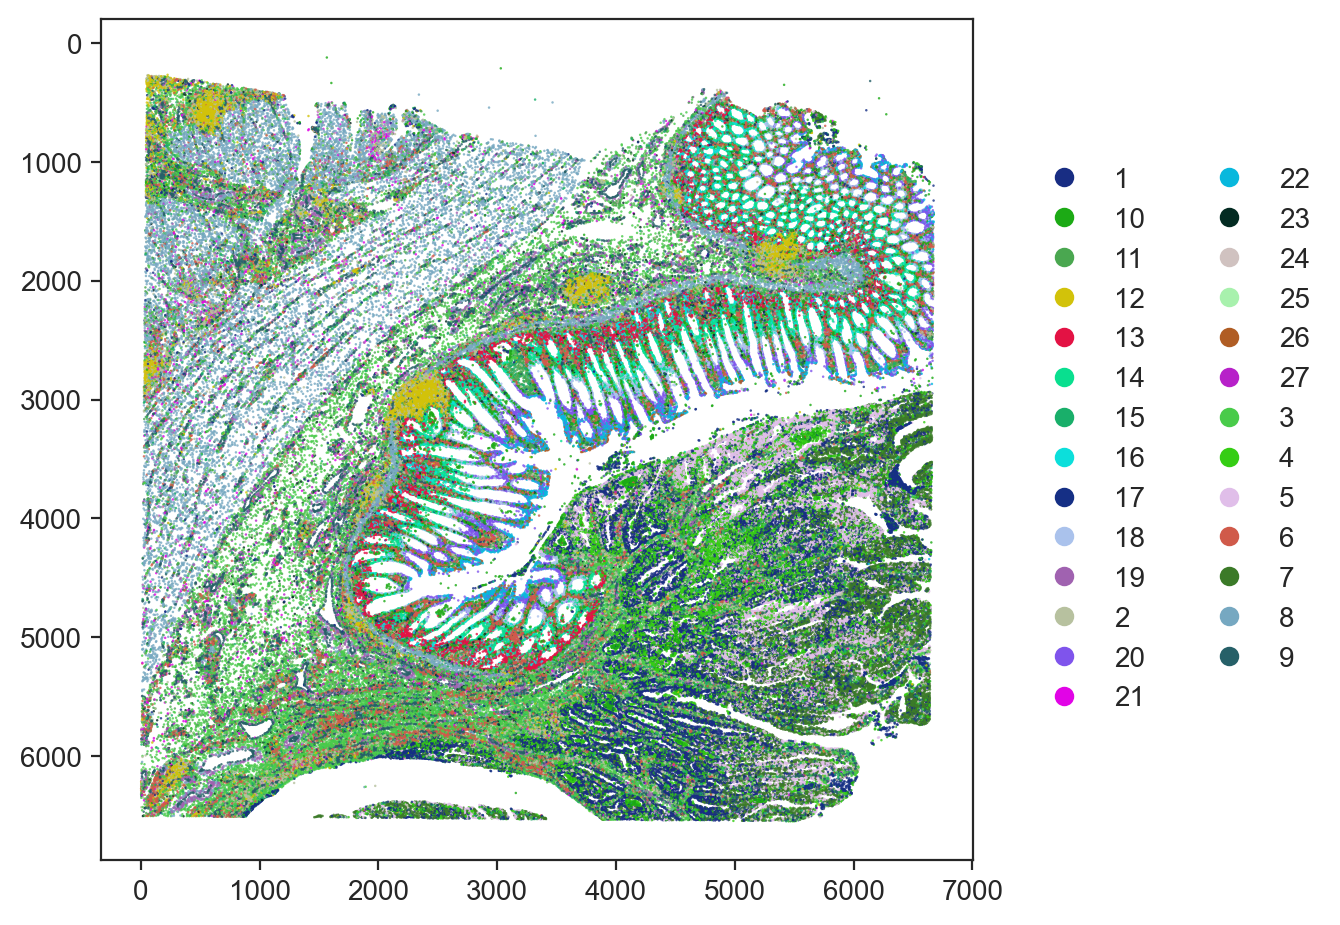

In [5]:
pst.plot_scatter(adata, color_by="cluster", ptsize=0.8, ticks=True, dpi=200)

We can highlight specific cell types or clusters within the data

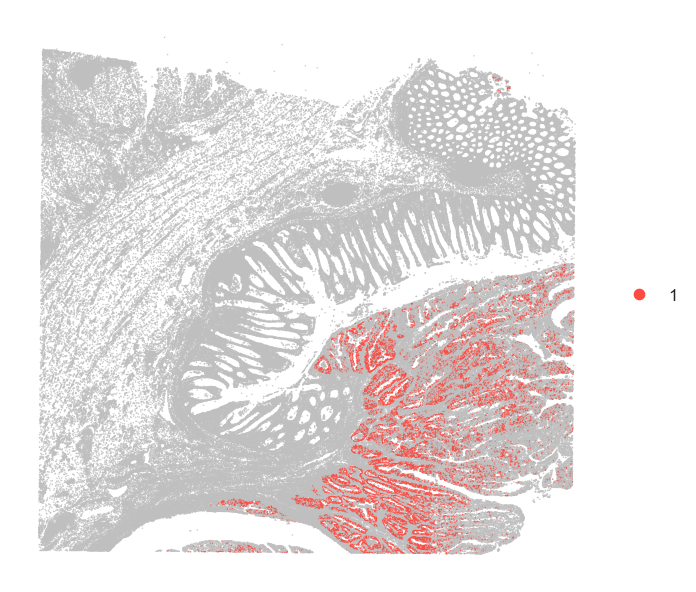

In [13]:
pst.plot_scatter(adata, color_by="cluster", highlight_cell="1", ptsize=0.8, dpi=120)

Focusing on a specific region of the dataset by setting the `xlims` and `ylims`.

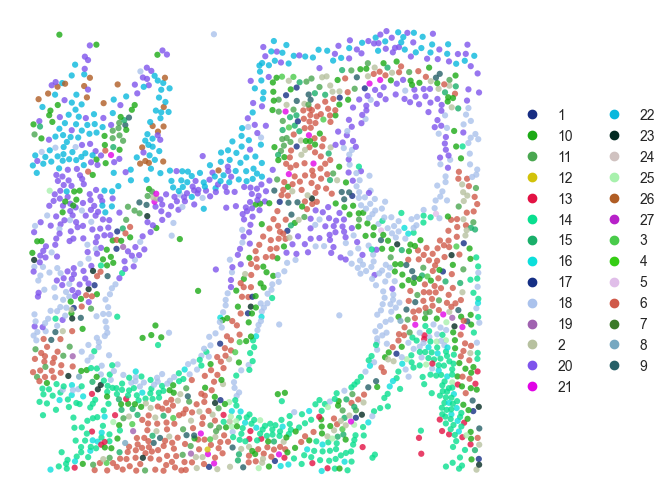

In [7]:
pst.plot_scatter(adata, color_by="cluster", xlims = [3000,3500], ylims = [4500,5000], ptsize=20, dpi = 100)

Creating cell polygons in order to visualize the data as spatial cell polygons.

In [8]:
adata = pst.create_polygons(adata)

100%|████████████████████████████████████████████████████████| 275874/275874 [01:24<00:00, 3272.48it/s]


Total number of polygons:  2010


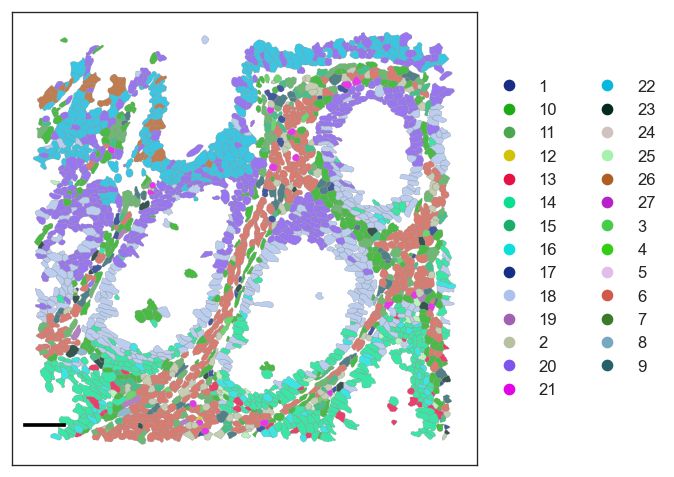

In [9]:
pst.plot_polygon(adata, plot_type="cell", color_by="cluster", xlims = [3000,3500], ylims = [4500,5000], dpi = 120)

we can also visualize the expression of specific genes and the distribution of transcripts on cell polygons.

Total number of polygons:  2010


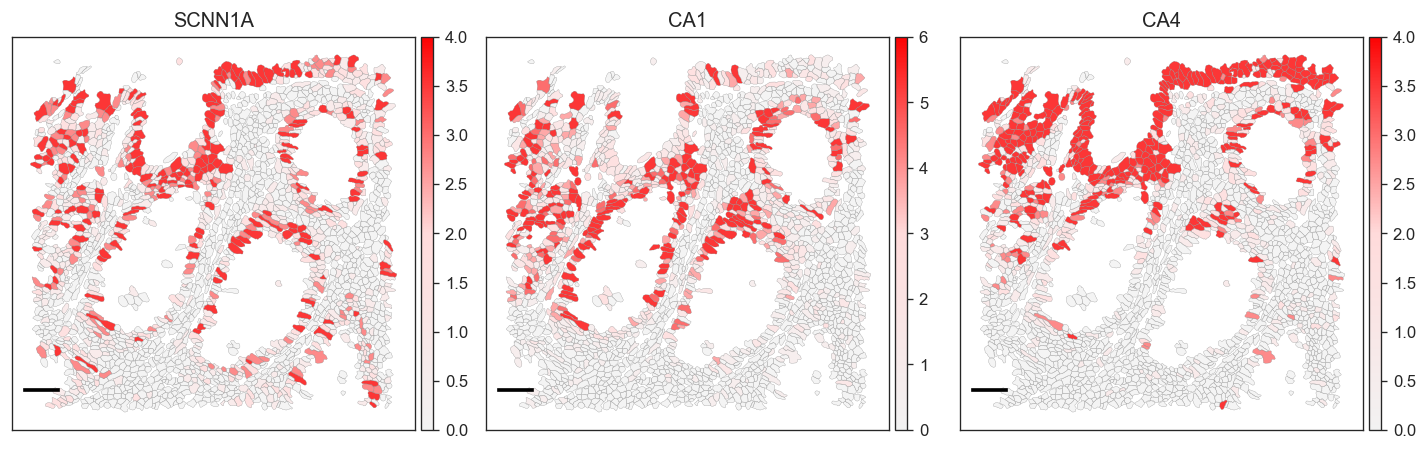

In [10]:
pst.plot_polygon(adata, plot_type="gene", genes = ['SCNN1A','CA1','CA4'], figsize=(12,4),
             xlims = [3000,3500], ylims = [4500,5000], dpi = 120)

Total number of polygons:  2010


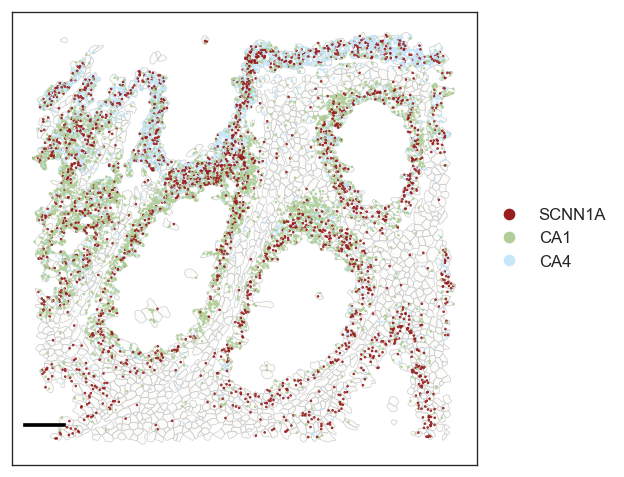

In [12]:
colors = ['#961E1E','#B0CF98',"#c7e6f9"]
features = ['SCNN1A','CA1','CA4']
map_dict = dict(zip(features, colors))

pst.plot_polygon(adata, plot_type="transcript", genes=features, 
                    xlims = [3000,3500], ylims = [4500,5000],
                    edgecolor="#bfbfbf", linewidth=0.4, cmap=map_dict, ptsize=0.3, dpi=120, legend_col=1)

## Visualizing VisiumHD data

VisiumHD provides gene expression data at different bin levels: 2 µm, 8 µm, and 16 µm. We will load data from all bin levels and store the AnnData objects in a dictionary. Note that the analysis directory is provided only at 8 µm and 16 µm bin sizes.

In [4]:
hd_dir = "Visium_HD_Human_Colon_Cancer_P5"
layer_dict = pst.read_visiumHD(hd_dir, bins = [2, 8, 16])

No analysis directory for bin size 2.


In [5]:
layer_dict.keys()

dict_keys(['bin_2um', 'bin_8um', 'bin_16um'])

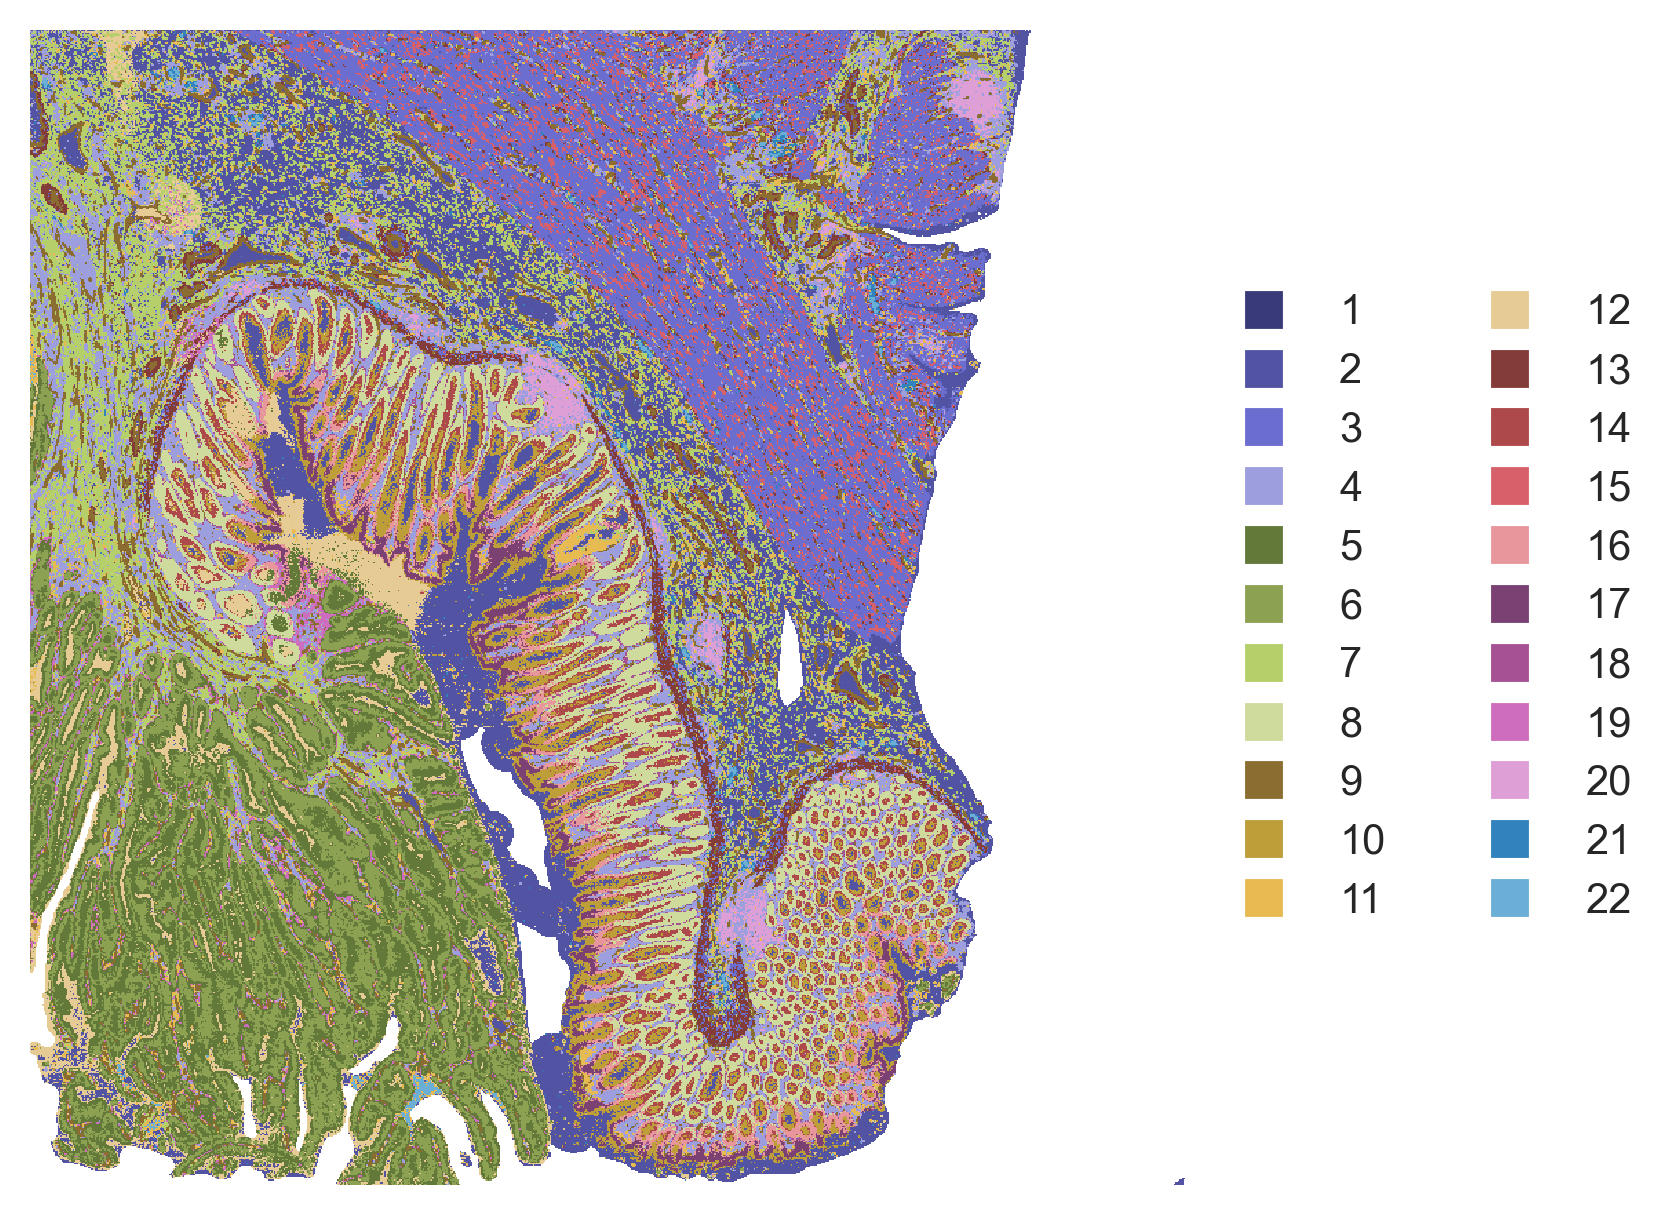

In [6]:
pst.plot_visiumHD(layer_dict['bin_8um'], 
                color_by = "cluster", 
                cmap=None, 
                ticks = False,
                legend_loc = "center left",
                bbox_to_anchor = (1.0, 0.5),
                legend_col = 2,
                image = False)

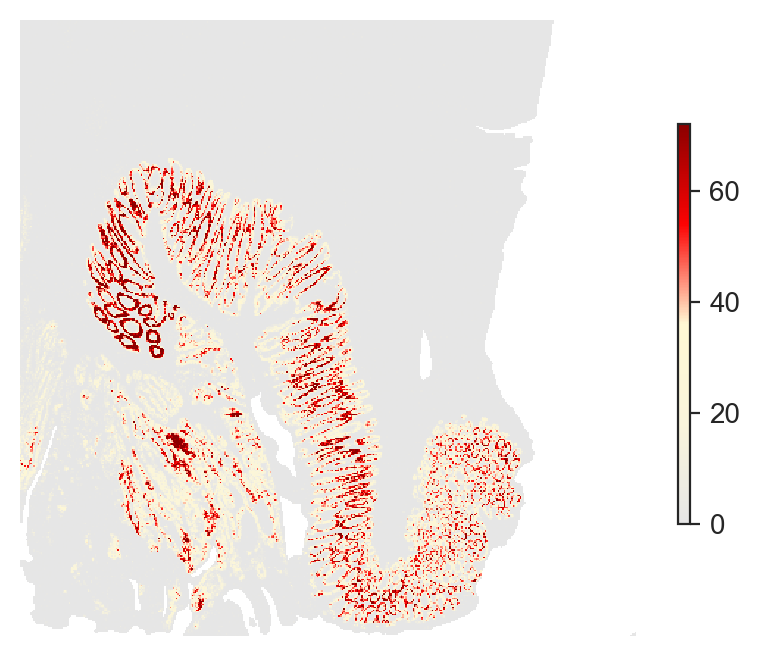

In [7]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('GrRd',['#E6E6E6', '#faf5dc','#fff8d4', '#fc0303','darkred'], N=256)

pst.plot_visiumHD(layer_dict['bin_16um'], 
                genes = ["PIGR"],
                cmap = cmap, 
                ticks = False,
                legend_loc = "center left",
                figsize = (4,4),
                dpi=200,
                legend_col = 2,
                image = False)

In [8]:
for ad in layer_dict.values():
    ad.var_names_make_unique()
    ad.raw = ad
    sc.pp.normalize_total(ad)

For visualization, we can also overlay molecular data on histology images. This process might take longer as each cell is represented as polygon data.

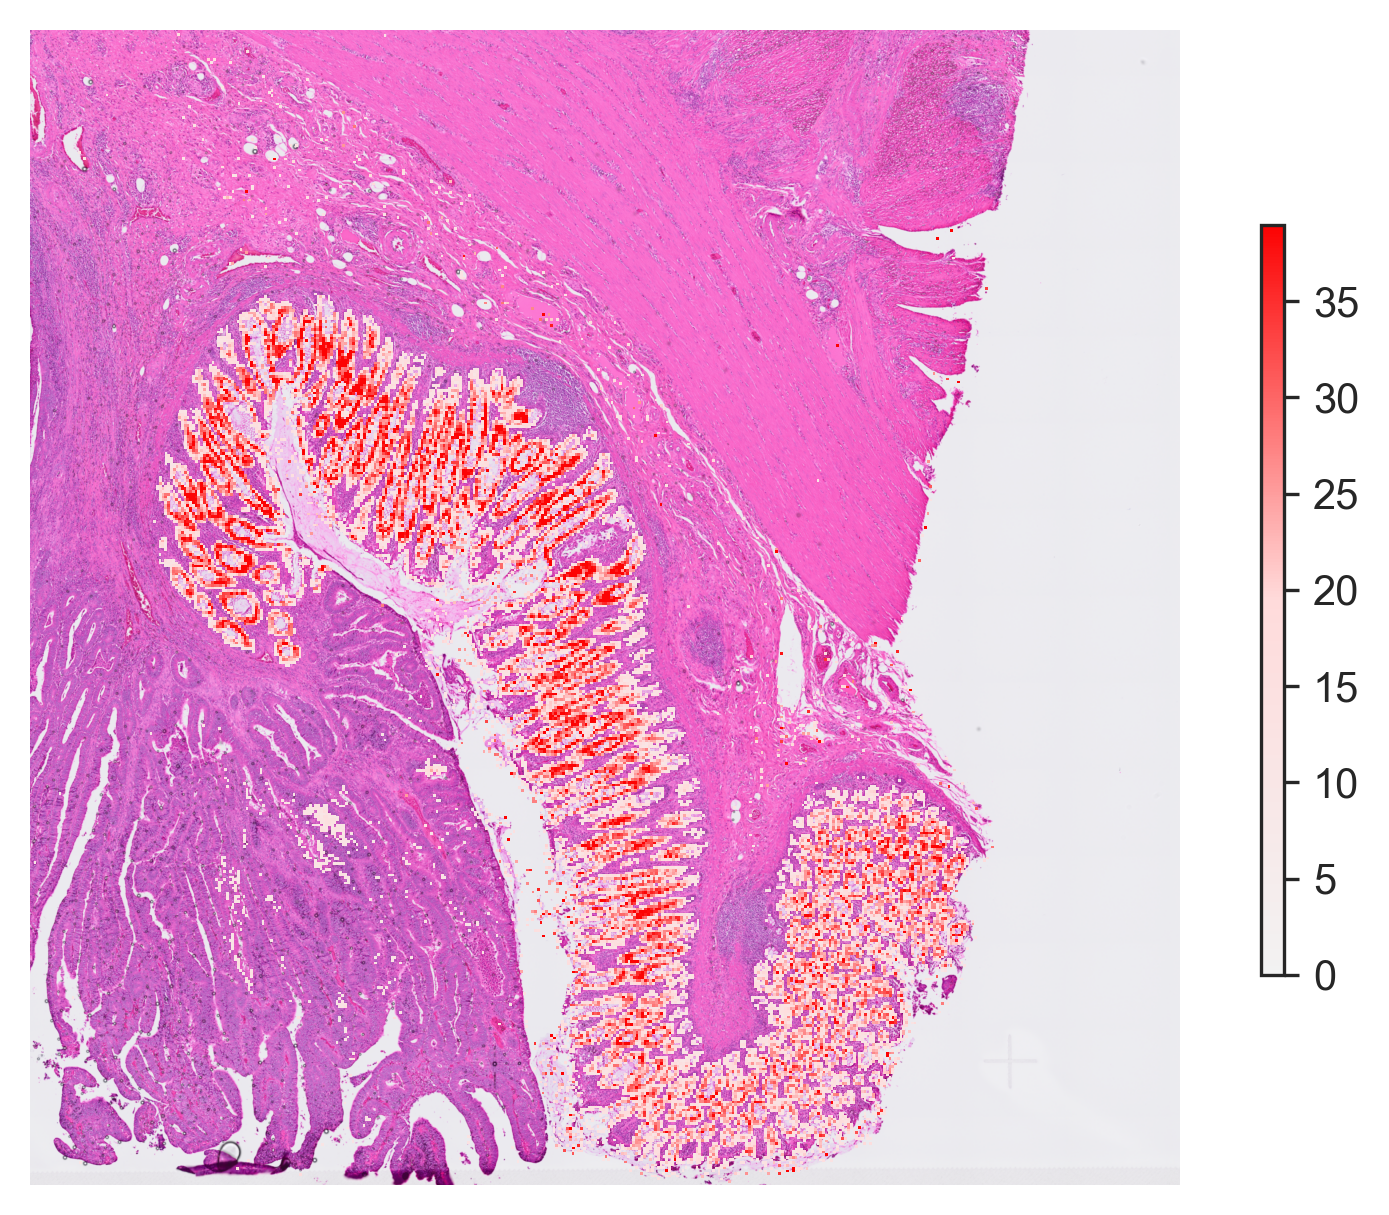

CPU times: user 32.6 s, sys: 609 ms, total: 33.2 s
Wall time: 32.9 s


In [9]:
%%time
pst.plot_visiumHD(layer_dict['bin_16um'], 
                genes = ["PIGR"], 
                cmap=None, 
                bin_size = 16, 
                ticks = False,
                legend_loc = "center left",
                bbox_to_anchor = (1.0, 0.5),
                legend_col = 2,
                image = True,
                cutoff = 10)

Let’s compare these resolutions in terms of spatial gene expression distribution.

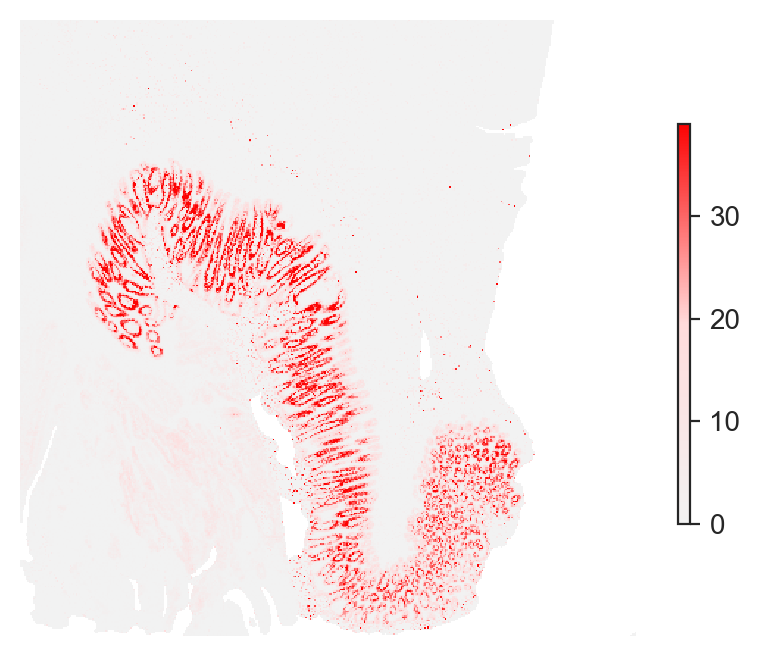

In [10]:
pst.plot_visiumHD(layer_dict['bin_16um'], 
                genes = ["PIGR"], 
                cmap=None, 
                ticks = False,
                figsize=(4,4),
                dpi = 200,
                legend_loc = "center left",
                image = False)

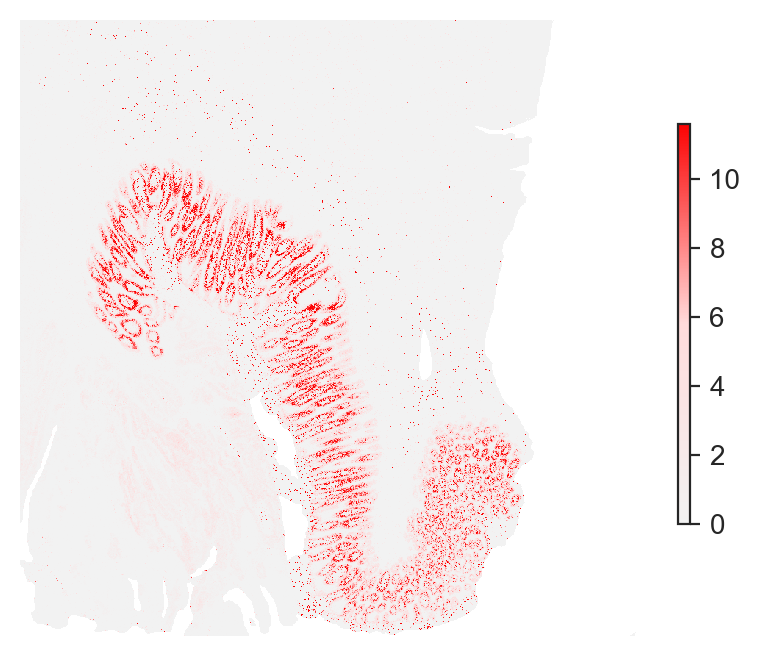

In [11]:
pst.plot_visiumHD(layer_dict['bin_8um'], 
                genes = ["PIGR"], 
                cmap=None, 
                ticks = False,
                figsize=(4,4),
                dpi = 200,
                legend_loc = "center left",
                image = False)

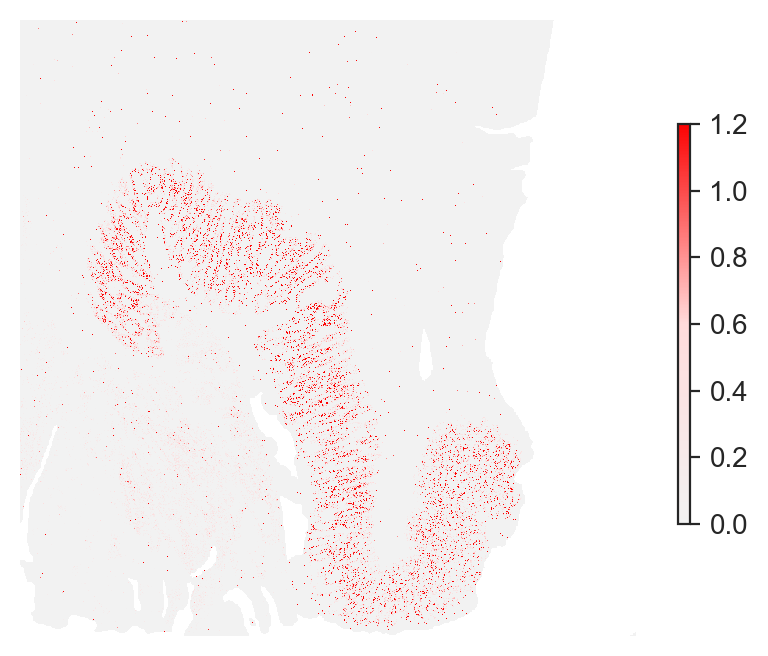

In [12]:
pst.plot_visiumHD(layer_dict['bin_2um'], 
                genes = ["PIGR"], 
                cmap=None,  
                ticks = False,
                figsize=(4,4),
                dpi = 200,
                legend_loc = "center left",
                image = False)